# SR-Dyna (Tiny Test)

In [262]:
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib

In [263]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/sr-dyna/srdyna.py'>

In [264]:
# Detour Task
EXPLORE_STEPS = 2000
POST_REWARD_TRIALS = 10
env = srdyna.SimpleGridWorld(world='worlds/tiny.txt')
S_LOC = (0, 0)
agent = srdyna.SRDyna(id=0, loc=S_LOC, env=env, post_step_replays=10, exp_lambda=1/5.)

Loaded 4x4 world with 18 states


In [265]:
def plot_srs(agent):
    fig, axs = plt.subplots(1, 5, dpi=144)
    for i, s in enumerate([0, 3, 12, 15, 16]):
        agent.render_sr(s, ax=axs[i])
    plt.show()    

Exploring...


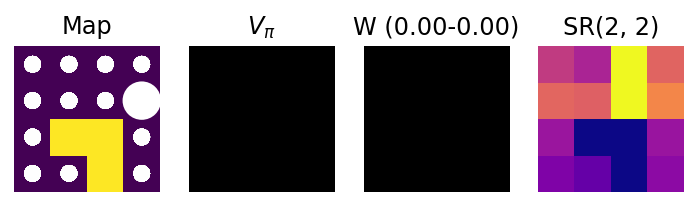

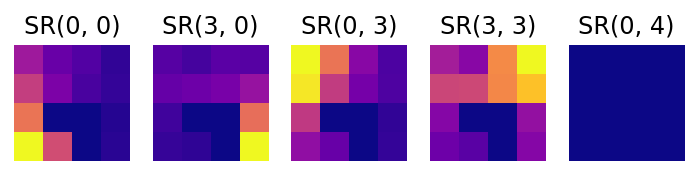

Learning reward W...


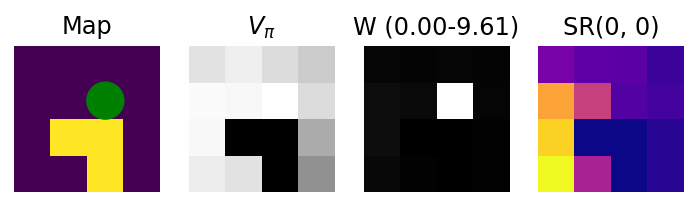

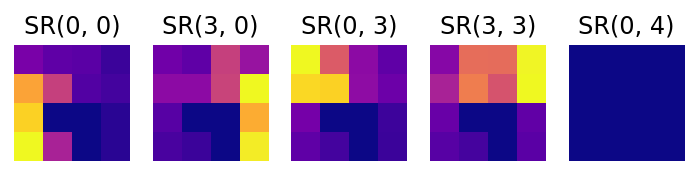

In [266]:
# Explore
print("Exploring...")
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

agent.make_plots()
plot_srs(agent)

# Add reward
R_LOC = (2, 2)
env.add_reward(R_LOC, 10)

print("Learning reward W...")
for i in range(POST_REWARD_TRIALS):
    # Repeated trials from S (until reward reached)
    agent.terminate_episode(reset_state=env.state_at_loc(S_LOC))
    done = False
    steps = 0
    MAX_STEPS = 200
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1

agent.make_plots()
plot_srs(agent)

In [267]:
# agent.record_trials(title="tiny", 
#                     learning=False,
#                     start_locs=[(0, 0), (3, 0)])